# Anscombe's Quartet — Data Analysis

Anscombe's Quartet is a classic dataset comprising four subsets (I, II, III, IV), each containing 11 points.
The subsets have **nearly identical descriptive statistics** yet look strikingly different when visualised — a powerful argument for always plotting your data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load data
df = pd.read_csv('anscombe_quartet.tsv', sep='\t')
print(df.shape)
df.head()

(44, 3)


,dataset,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


## 1. Descriptive Statistics per Dataset

In [2]:
desc = df.groupby('dataset').agg(
    x_mean=('x', 'mean'),
    x_var=('x', 'var'),
    y_mean=('y', 'mean'),
    y_var=('y', 'var'),
    n=('x', 'count')
).round(2)

print("Descriptive statistics per dataset:")
desc

Descriptive statistics per dataset:


,x_mean,x_var,y_mean,y_var,n
dataset,,,,,
I,9.0,11.0,7.5,4.13,11
II,9.0,11.0,7.5,4.13,11
III,9.0,11.0,7.5,4.12,11
IV,9.0,11.0,7.5,4.12,11


## 2. Correlation & Linear Regression per Dataset

In [3]:
reg_results = []

for name, group in df.groupby('dataset'):
    slope, intercept, r, p, se = stats.linregress(group['x'], group['y'])
    reg_results.append({
        'dataset': name,
        'slope': round(slope, 3),
        'intercept': round(intercept, 3),
        'r': round(r, 3),
        'r_squared': round(r**2, 3),
        'p_value': round(p, 4)
    })

reg_df = pd.DataFrame(reg_results).set_index('dataset')
print("Linear regression summary:")
reg_df

Linear regression summary:


,slope,intercept,r,r_squared,p_value
dataset,,,,,
I,0.5,3.000,0.816,0.667,0.0022
II,0.5,3.001,0.816,0.666,0.0022
III,0.5,3.002,0.816,0.666,0.0022
IV,0.5,3.002,0.817,0.667,0.0022


## 3. Scatter Plots with Regression Lines

Despite near-identical statistics above, the four datasets tell very different stories.

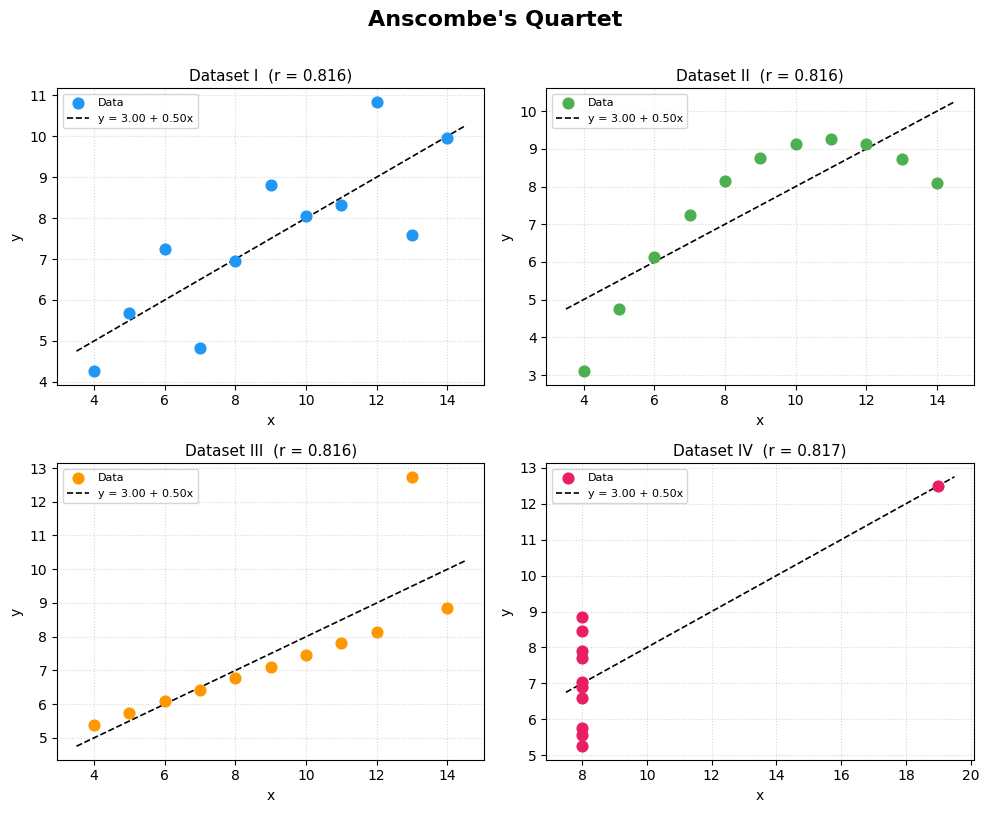

Plot saved to anscombe_plots.png


In [4]:
datasets = ['I', 'II', 'III', 'IV']
colors = ['#2196F3', '#4CAF50', '#FF9800', '#E91E63']

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=False, sharey=False)
fig.suptitle("Anscombe's Quartet", fontsize=16, fontweight='bold', y=1.01)

for ax, name, color in zip(axes.flat, datasets, colors):
    group = df[df['dataset'] == name]
    slope, intercept, r, _, _ = stats.linregress(group['x'], group['y'])

    # Scatter
    ax.scatter(group['x'], group['y'], color=color, s=60, zorder=3, label='Data')

    # Regression line
    x_line = np.linspace(group['x'].min() - 0.5, group['x'].max() + 0.5, 100)
    ax.plot(x_line, intercept + slope * x_line, 'k--', linewidth=1.2, label=f'y = {intercept:.2f} + {slope:.2f}x')

    ax.set_title(f'Dataset {name}  (r = {r:.3f})', fontsize=11)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(fontsize=8)
    ax.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.savefig('anscombe_plots.png', dpi=150, bbox_inches='tight')
plt.show()
print('Plot saved to anscombe_plots.png')

## 4. Residual Plots

Residuals from the regression reveal the structural differences between datasets more clearly.

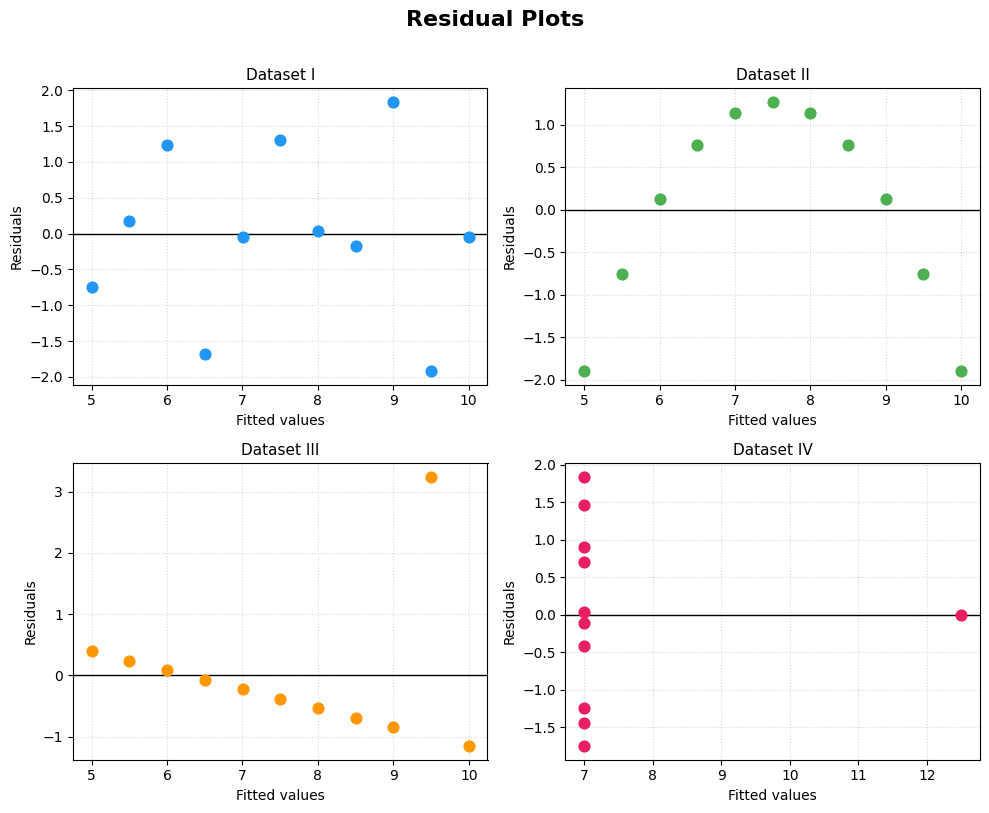

Residual plot saved to anscombe_residuals.png


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Residual Plots", fontsize=16, fontweight='bold', y=1.01)

for ax, name, color in zip(axes.flat, datasets, colors):
    group = df[df['dataset'] == name]
    slope, intercept, _, _, _ = stats.linregress(group['x'], group['y'])
    fitted = intercept + slope * group['x']
    residuals = group['y'] - fitted

    ax.axhline(0, color='black', linewidth=1)
    ax.scatter(fitted, residuals, color=color, s=60, zorder=3)
    ax.set_title(f'Dataset {name}', fontsize=11)
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')
    ax.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.savefig('anscombe_residuals.png', dpi=150, bbox_inches='tight')
plt.show()
print('Residual plot saved to anscombe_residuals.png')

## 5. Key Takeaways

| Dataset | Story |
|---------|-------|
| **I**   | Well-behaved linear relationship — the textbook case. |
| **II**  | Clearly curved (quadratic) relationship; a linear model is a poor fit. |
| **III** | Linear relationship with one high-leverage outlier that distorts the regression line. |
| **IV**  | Nearly all x-values are identical (x=8); one extreme outlier at x=19 creates the apparent correlation. |

**Conclusion:** Summary statistics alone (mean, variance, correlation, regression coefficients) are insufficient to characterise a dataset. Visual inspection is essential before drawing any conclusions.